In [21]:
import os 
import numpy as np 
import pandas as pd 
import pickle

from tensorflow import keras
from keras import optimizers, losses, activations, models 
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization 
from sklearn.model_selection import train_test_split

from tensorflow.keras import utils as np_utils #since Tensorflow 2, thats how you import some keras submodules such as keras.utils (it was giving me errors the other way)
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display

SAMPLE_RATE = 22050
DURATION = 1
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

N_FFT = 1024
HOP_LENGTH = 128
N_MFCC = 15

# Prepare data

In [6]:
def show_mfcc(mfcc):
    librosa.display.specshow(mfcc)
    plt.xlabel("Time")
    plt.ylabel("MFCC")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

In [12]:
#Getting the path to the audio folders

# Change with local
#TestPath ='C:\\_University\\COM3025\\Coursework\\Speech-recognition-COM3025\\data\\raw\\test\\audio\\'
#TrainPath = 'C:\\_University\\COM3025\\Coursework\\Speech-recognition-COM3025\\data\\raw\\train\\audio\\'

#(Alex) the paths above weren't working for me so added my own, feel free to coment them out
TestPath = 'data/test/audio'
TrainPath = 'data/train/audio'


PermitedLabels = ['yes','no','up','down','left','right','on','off','stop','go','silence','unknown']

TestSubPath = [x.name for x in os.scandir(TestPath)] # Get name of subdirectories or files
TrainSubPath = [x.name for x in os.scandir(TrainPath)] # Get name of subdirectories or files

TrainSubPath.remove('_background_noise_')#remove directory of background noises 


In [22]:
# Load the models
CNN1D = keras.models.load_model('models\CNN2')
CONVLSTM = keras.models.load_model('models\ConvLSTM')
GRU = keras.models.load_model('models\GRU')
CNN2D = keras.models.load_model('models\ross_cnn')

OSError: SavedModel file does not exist at: modelsoss_cnn\{saved_model.pbtxt|saved_model.pb}

In [16]:
# One-hot encode the classes
y = list(range(len(PermitedLabels)))
y = np_utils.to_categorical(y)

def one_hot_to_label(one_hot):
    return PermitedLabels[np.argmax(one_hot)]

def label_to_one_hot(label):
    idx = PermitedLabels.index(label)
    return y[idx]


#Helper functions to pad and cut the samples
def pad_audio(signal):
    return np.pad(signal, pad_width = (SAMPLE_RATE - len(signal), 0), mode='constant', constant_values=(0,0))


## DEMO 1 

22050


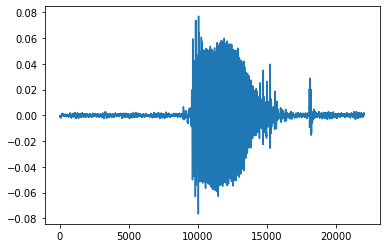

In [17]:
#Example of file load, plot and playback 
audio, sr = librosa.load('data/train/audio/bed/00f0204f_nohash_1.wav')
audio = pad_audio(audio)
print(sr)
plt.plot(audio) #Plotting the sound
plt.show()

IPython.display.Audio(audio,rate = sr)#Playing the sound

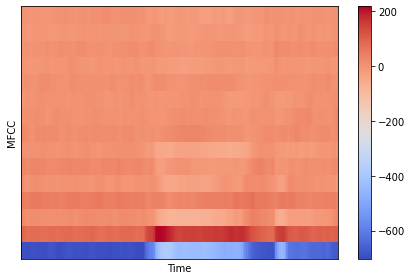

In [18]:
mfcc = librosa.feature.mfcc(audio, n_fft=N_FFT, hop_length=HOP_LENGTH, n_mfcc=N_MFCC)
show_mfcc(mfcc)